In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:


# Permanent URL for the Pima Indians Diabetes Dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [14]:
# Defining medical column names
cols = ['pregnancies', 'glucose', 'blood_press', 'skin_thick', 'insulin', 'bmi', 'pedigree', 'age', 'outcome']
df_med = pd.read_csv(url, names=cols)
df_med.head()

,pregnancies,glucose,blood_press,skin_thick,insulin,bmi,pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# 1. Body Mass Category (Feature 1)
df_med['is_obese'] = (df_med['bmi'] >= 30).astype(int)

# 2. Glucose to Insulin Ratio (Feature 2) - Metabolic health indicator
df_med['gluco_insul_ratio'] = df_med['glucose'] / (df_med['insulin'] + 1)

# 3. Age Groups (Feature 3)
df_med['is_senior'] = (df_med['age'] > 50).astype(int)

# 4. Blood Pressure Risk (Feature 4)
df_med['high_bp'] = (df_med['blood_press'] > 80).astype(int)

# 5. Pregnancy Impact (Feature 5)
df_med['preg_per_year'] = df_med['pregnancies'] / (df_med['age'] - 18).replace(0, 1)

# 6. Glucose Stress (Feature 6)
df_med['high_glucose'] = (df_med['glucose'] > 125).astype(int)

# 7. Skin Thickness Z-Score (Feature 7) - Normalized health metric
df_med['skin_norm'] = (df_med['skin_thick'] - df_med['skin_thick'].mean()) / df_med['skin_thick'].std()

# 8. Metabolic Syndrome Score (Feature 8) - Combined risk factors
df_med['risk_score'] = df_med['high_bp'] + df_med['high_glucose'] + df_med['is_obese']

# 9. Pedigree-Age Interaction (Feature 9)
df_med['genetic_exposure'] = df_med['pedigree'] * df_med['age']

# 10. Log BMI (Feature 10) - Reducing skewness
df_med['log_bmi'] = np.log1p(df_med['bmi'])

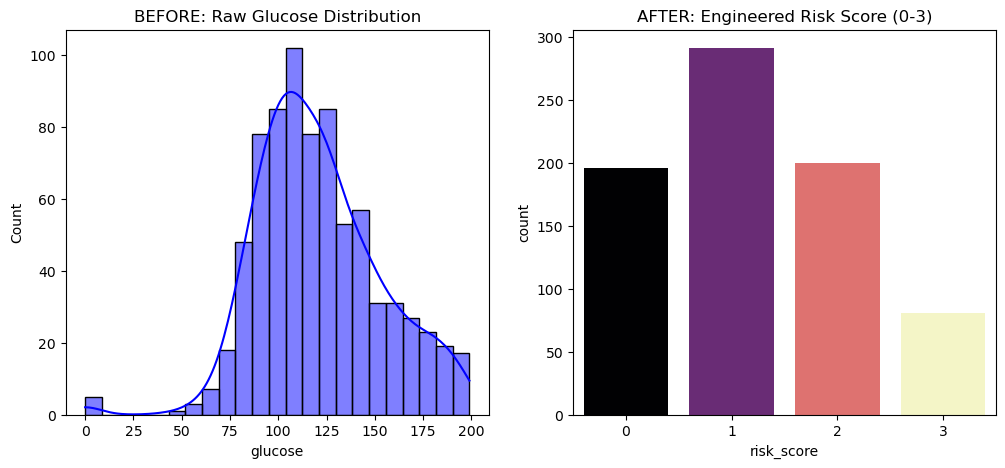

In [18]:
plt.figure(figsize=(12, 5))
# Raw Data
plt.subplot(1, 2, 1)
sns.histplot(df_med['glucose'], kde=True, color='blue')
plt.title("BEFORE: Raw Glucose Distribution")

# Engineered Feature
plt.subplot(1, 2, 2)
# Updated code to remove the FutureWarning
sns.countplot(x='risk_score', data=df_med, hue='risk_score', palette='magma', legend=False)
plt.title("AFTER: Engineered Risk Score (0-3)")
plt.show()

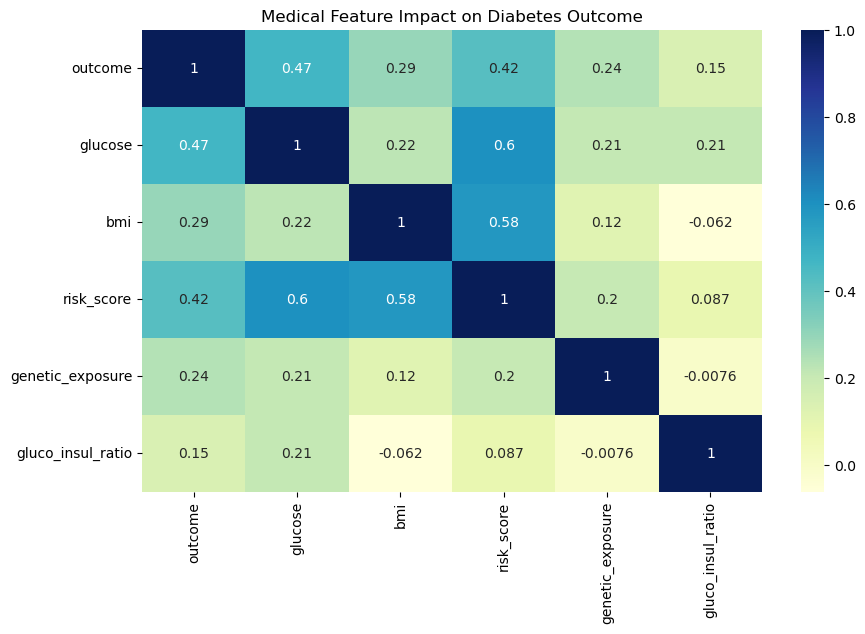

In [19]:
plt.figure(figsize=(10, 6))
check_cols = ['outcome', 'glucose', 'bmi', 'risk_score', 'genetic_exposure', 'gluco_insul_ratio']
sns.heatmap(df_med[check_cols].corr(), annot=True, cmap='YlGnBu')
plt.title("Medical Feature Impact on Diabetes Outcome")
plt.show()

In [20]:
print("Medical Model by Hadiqa Khan.")

Medical Model by Hadiqa Khan.
